## Stationarity of data -- II

3-17 after Joseph tried differencing the data


### Load the required libraries

In [1]:
import tensorflow as tf
# import tensorflowvisu
import math
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
# Set charts to view inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
print("Tensorflow version " + tf.__version__)

/Users/tjd/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensorflow version 1.1.0


In [2]:
# plot size
plt.rcParams["figure.figsize"] = (20,12)

### Dickey-Fuller test for stationarity

If p < 0.5, the time series is stationary. Otherwise (generally), the time series is non-stationary (seasonal) and has to be differenced or otherwise transformed.  
  
See: http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/  
And: https://machinelearningmastery.com/time-series-data-stationary-python/


In [5]:
df_diff = pd.read_csv('btc_all_diff.csv'); df = pd.read_csv('btc_all.csv')

In [28]:

df_diff.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:

df_diff.head()


,date,trans,volatil,bidask,price,volume,transpm,goog_idx,epu_idx,exp.sem
0,2/25/16 0:00,-12655,-0.313818,-0.035583,1.014046,6.176645e+06,-25.374167,-2.0,57.50,0.063306
1,2/26/16 0:00,-21458,-0.092740,0.037374,8.065595,1.460536e+08,-42.287292,-1.0,41.87,0.106433
2,2/27/16 0:00,51259,0.197350,0.014298,-2.965509,-4.094228e+07,31.346111,-2.0,126.51,0.056521
3,2/28/16 0:00,31884,0.267981,0.065002,7.212824,2.760379e+08,118.520208,0.0,97.94,0.047878
4,2/29/16 0:00,11774,-0.097274,-0.024977,-2.126012,-3.762465e+08,-24.499028,3.0,65.74,0.139419


In [7]:
df.head()

,date,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx,epu_idx,exp_sem
0,2/25/16 0:00,163,216290,0.877869,0.395403,422.833398,2.414980e+07,295.393889,6,57.50,0.063306
1,2/26/16 0:00,163,203635,0.564052,0.359820,423.847443,3.032645e+07,270.019722,6,41.87,0.106433
2,2/27/16 0:00,163,182177,0.471312,0.397194,431.913038,1.763800e+08,227.732431,6,126.51,0.056521
3,2/28/16 0:00,163,233436,0.668662,0.411491,428.947530,1.354377e+08,259.078542,9,97.94,0.047878
4,2/29/16 0:00,163,265320,0.936643,0.476494,436.160354,4.114757e+08,377.598750,9,65.74,0.139419


In [74]:
cols=['diff_B','trans', 'volatil', 'bidask', 'price', 'volume', 'transpm', 'goog_idx']
df[cols].diff().describe()

,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000,730.000000
mean,3.900000,-84.597260,0.063558,0.001099,13.135743,1.526198e+06,-0.295782,0.061644
std,28.579293,34295.187353,18.190502,0.143265,289.574435,3.254817e+08,53.871499,4.257202
min,-90.000000,-111929.000000,-180.675443,-0.957857,-2418.223320,-3.453740e+09,-255.476250,-37.000000
25%,0.000000,-22330.500000,-0.853176,-0.040285,-5.776206,-1.993623e+07,-18.184635,0.000000
50%,0.000000,-2319.000000,-0.041061,-0.001441,2.366589,-8.148948e+05,-1.846285,0.000000
75%,0.000000,20841.000000,0.607902,0.045110,27.449389,1.725295e+07,12.697837,0.000000
max,370.000000,126959.000000,190.416830,0.743644,2404.451640,3.126980e+09,273.321458,41.000000


In [75]:
df[cols].describe()

,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx
count,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000
mean,694.860465,258566.523940,15.538916,0.570501,3096.564349,3.522164e+08,185.718151,17.132695
std,664.133884,53233.899979,30.038996,0.303682,4079.464481,6.423527e+08,190.340555,20.647270
min,158.000000,131875.000000,0.309804,0.122368,403.525223,7.692798e+06,6.829306,0.000000
25%,217.000000,220496.500000,1.068491,0.340473,632.484996,2.579053e+07,33.562370,6.000000
50%,441.000000,250241.000000,2.955280,0.489825,1046.119846,6.951160e+07,116.001852,10.000000
75%,923.000000,292315.000000,13.744620,0.773207,3986.355059,3.129288e+08,280.964062,21.000000
max,3010.000000,490644.000000,299.185609,1.575526,19389.505010,5.457602e+09,1060.248333,100.000000


## Changes to make

1) Add back the minining difficulty variable (diff_B) and rename  
  
2) Correct differencing on the goog_idx; it appears to be mistaken  
  
The code below runs Dickey-Fuller tests on the differenced data; they are stationary using pandas .diff() default.


In [81]:
cols2 = ['date','epu_idx','exp_sem']
df_new = pd.concat([df[cols].diff(), df[cols2]], axis=1)

In [82]:
df_new.head()

,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx,date,epu_idx,exp_sem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/25/16 0:00,57.50,0.063306
1,0.0,-12655.0,-0.313818,-0.035583,1.014046,6.176645e+06,-25.374167,0.0,2/26/16 0:00,41.87,0.106433
2,0.0,-21458.0,-0.092740,0.037374,8.065595,1.460536e+08,-42.287292,0.0,2/27/16 0:00,126.51,0.056521
3,0.0,51259.0,0.197350,0.014298,-2.965509,-4.094228e+07,31.346111,3.0,2/28/16 0:00,97.94,0.047878
4,0.0,31884.0,0.267981,0.065002,7.212824,2.760379e+08,118.520208,0.0,2/29/16 0:00,65.74,0.139419


In [83]:
df.head()

,date,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx,epu_idx,exp_sem
0,2/25/16 0:00,163,216290,0.877869,0.395403,422.833398,2.414980e+07,295.393889,6,57.50,0.063306
1,2/26/16 0:00,163,203635,0.564052,0.359820,423.847443,3.032645e+07,270.019722,6,41.87,0.106433
2,2/27/16 0:00,163,182177,0.471312,0.397194,431.913038,1.763800e+08,227.732431,6,126.51,0.056521
3,2/28/16 0:00,163,233436,0.668662,0.411491,428.947530,1.354377e+08,259.078542,9,97.94,0.047878
4,2/29/16 0:00,163,265320,0.936643,0.476494,436.160354,4.114757e+08,377.598750,9,65.74,0.139419


In [84]:
df_diff.head()

,date,trans,volatil,bidask,price,volume,transpm,goog_idx,epu_idx,exp.sem
0,2/25/16 0:00,-12655,-0.313818,-0.035583,1.014046,6.176645e+06,-25.374167,-2.0,57.50,0.063306
1,2/26/16 0:00,-21458,-0.092740,0.037374,8.065595,1.460536e+08,-42.287292,-1.0,41.87,0.106433
2,2/27/16 0:00,51259,0.197350,0.014298,-2.965509,-4.094228e+07,31.346111,-2.0,126.51,0.056521
3,2/28/16 0:00,31884,0.267981,0.065002,7.212824,2.760379e+08,118.520208,0.0,97.94,0.047878
4,2/29/16 0:00,11774,-0.097274,-0.024977,-2.126012,-3.762465e+08,-24.499028,3.0,65.74,0.139419


In [85]:
# get rid of first NaN row
df_new.drop(0, axis=0, inplace=True)

In [86]:
df_new.head()

,diff_B,trans,volatil,bidask,price,volume,transpm,goog_idx,date,epu_idx,exp_sem
1,0.0,-12655.0,-0.313818,-0.035583,1.014046,6.176645e+06,-25.374167,0.0,2/26/16 0:00,41.87,0.106433
2,0.0,-21458.0,-0.092740,0.037374,8.065595,1.460536e+08,-42.287292,0.0,2/27/16 0:00,126.51,0.056521
3,0.0,51259.0,0.197350,0.014298,-2.965509,-4.094228e+07,31.346111,3.0,2/28/16 0:00,97.94,0.047878
4,0.0,31884.0,0.267981,0.065002,7.212824,2.760379e+08,118.520208,0.0,2/29/16 0:00,65.74,0.139419
5,0.0,11774.0,-0.097274,-0.024977,-2.126012,-3.762465e+08,-24.499028,0.0,3/1/16 0:00,49.35,0.099477


In [89]:
df_new.to_csv('btc_td_diff.csv')

In [90]:
ls

Brownlee_test_I.ipynb         bitcoinity_vola.csv
RATEINF-INFLATION_USA.csv     btc_all.csv
Stationarity-II.ipynb         btc_all_diff.csv
Stationarity.ipynb            btc_td_diff.csv
TensorFlow_Deep_Net.ipynb     crypto_sent.csv
bitcoin_semscore.csv          crypto_tensor_test-II.ipynb
bitcoinity_all.csv            crypto_tensor_test.ipynb
bitcoinity_bidask.csv         crypto_tensor_test_III.ipynb
bitcoinity_diff.csv           crypto_tensor_test_IV.ipynb
bitcoinity_hashrate.csv       crypto_tensor_test_V.ipynb
bitcoinity_pv.csv             crypto_tensor_test_VI.ipynb
bitcoinity_tpm.csv            quandl_test.ipynb
bitcoinity_trans.csv          test_mod.h5
bitcoinity_vol.csv            uncertainty_Index.csv


In [30]:
from statsmodels.tsa.stattools import adfuller
#series = df_diff['tran['trans']
#X = series.values
result = adfuller(df_diff['trans'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.331047
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [31]:
result = adfuller(df_diff['volatil'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.482372
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [32]:
result = adfuller(df_diff['bidask'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.167045
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [33]:
result = adfuller(df_diff['price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.467217
p-value: 0.000225
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [34]:
result = adfuller(df_diff['volume'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.873067
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [35]:
result = adfuller(df_diff['transpm'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.403691
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [36]:
result = adfuller(df_diff['goog_idx'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.669109
p-value: 0.000001
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [37]:
result = adfuller(df_diff['epu_idx'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.239775
p-value: 0.017795
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [39]:
result = adfuller(df_diff['exp.sem'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.117391
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


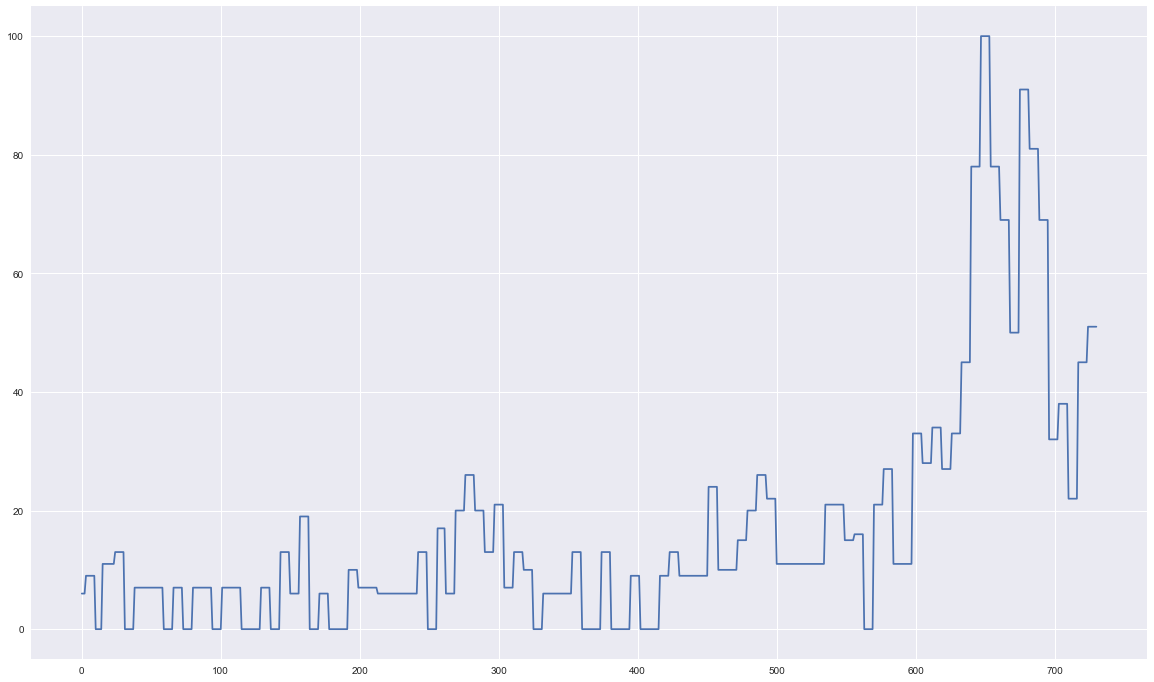

In [65]:
plt.plot(df['goog_idx'])
plt.show()

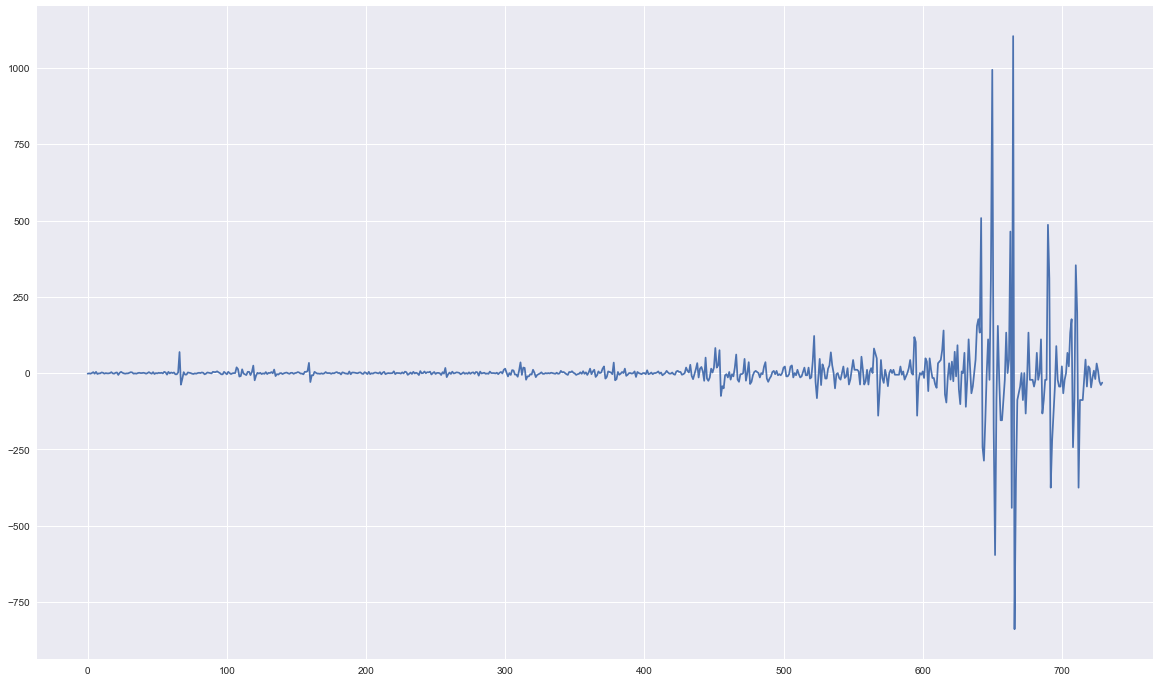

In [66]:
plt.plot(df_diff['goog_idx'])
plt.show()

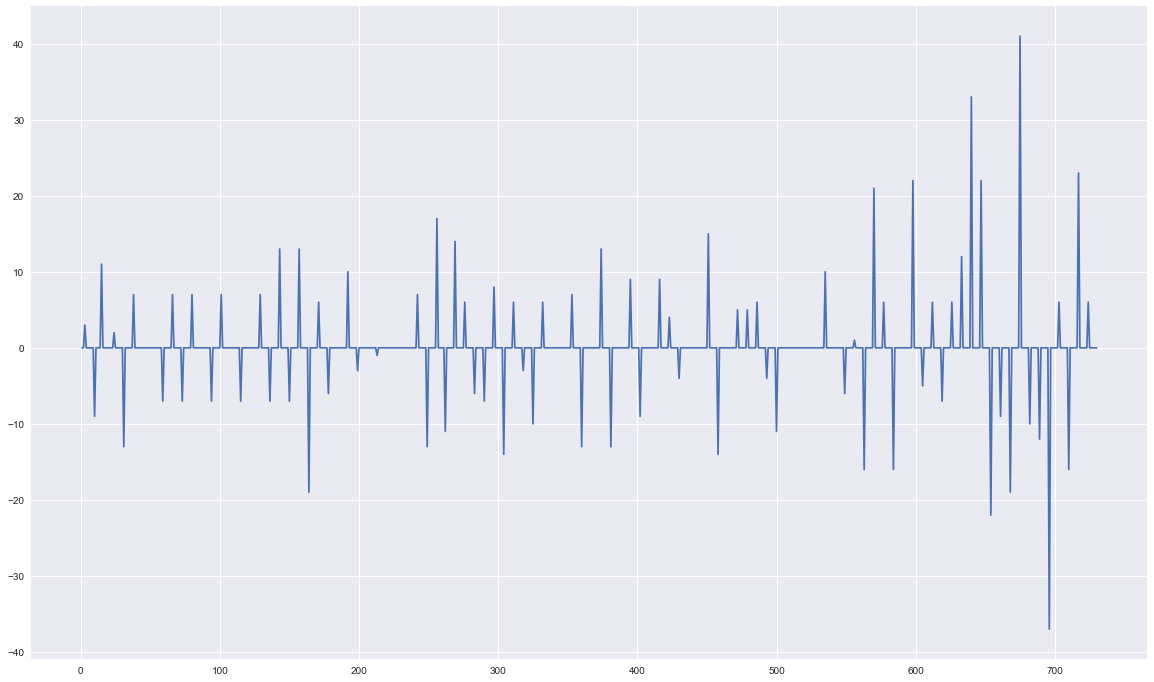

In [67]:
plt.plot(df['goog_idx'].diff())
plt.show()

In [68]:
df['goog_idx'].diff().head()

0    NaN
1    0.0
2    0.0
3    3.0
4    0.0
Name: goog_idx, dtype: float64

### Test and plots
The function computes a Dickey-Fuller test and plots the feature against a rolloing mean and rolling standard deviation.

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).mean()
        
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

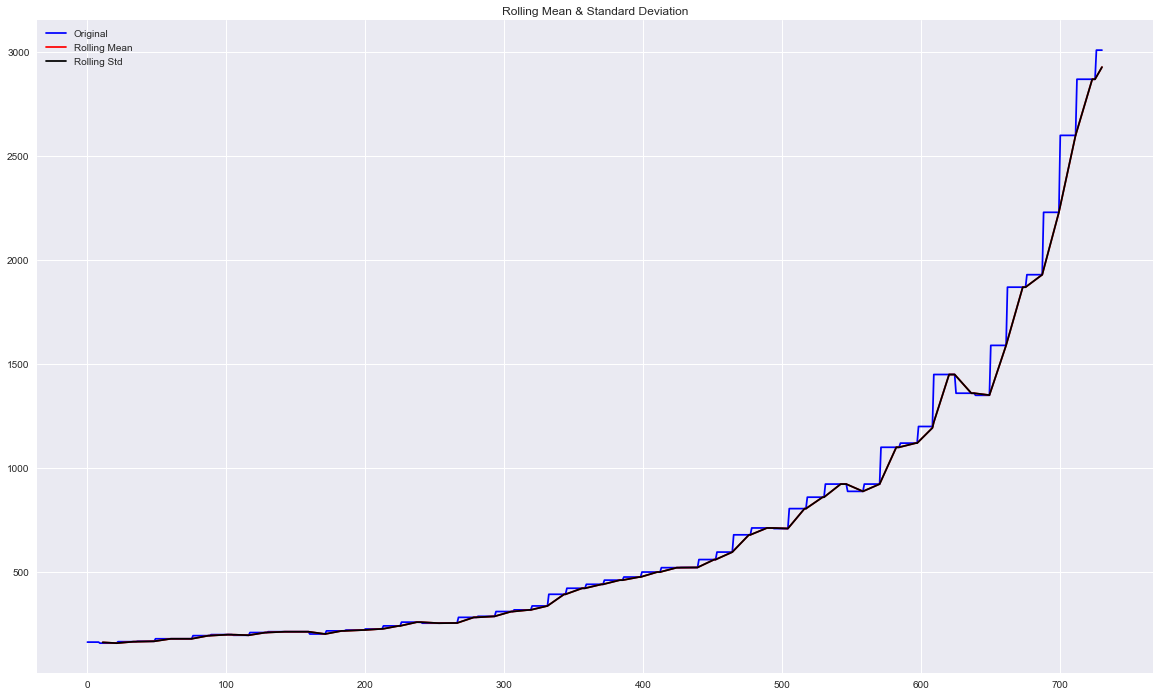

Results of Dickey-Fuller Test:
Test Statistic                   3.763723
p-value                          1.000000
#Lags Used                      16.000000
Number of Observations Used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [26]:
test_stationarity(df['diff_B'])

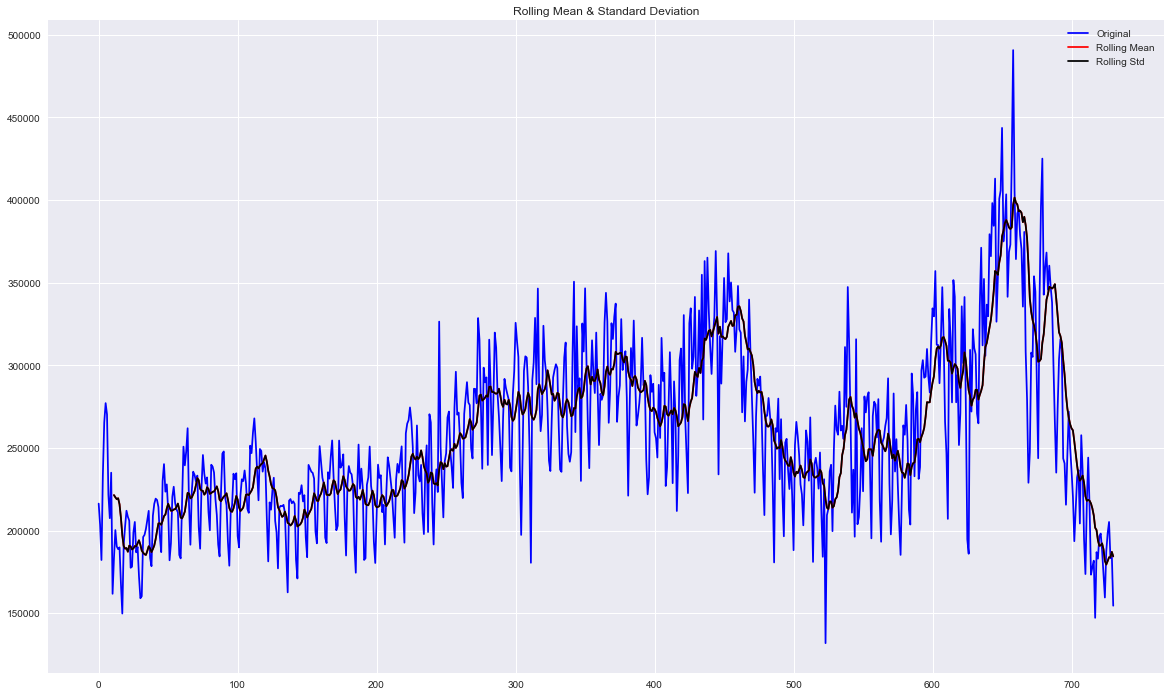

Results of Dickey-Fuller Test:
Test Statistic                  -2.066569
p-value                          0.258168
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [27]:
test_stationarity(df['trans'])

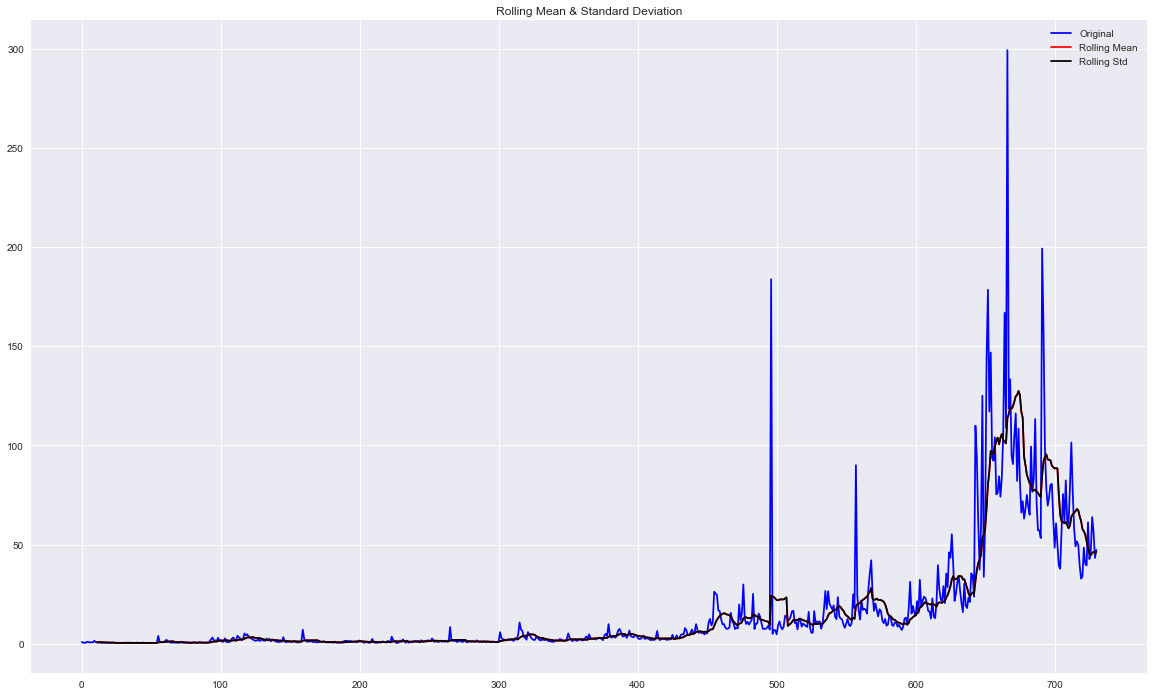

Results of Dickey-Fuller Test:
Test Statistic                  -1.559894
p-value                          0.503702
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [28]:
test_stationarity(df['volatil'])

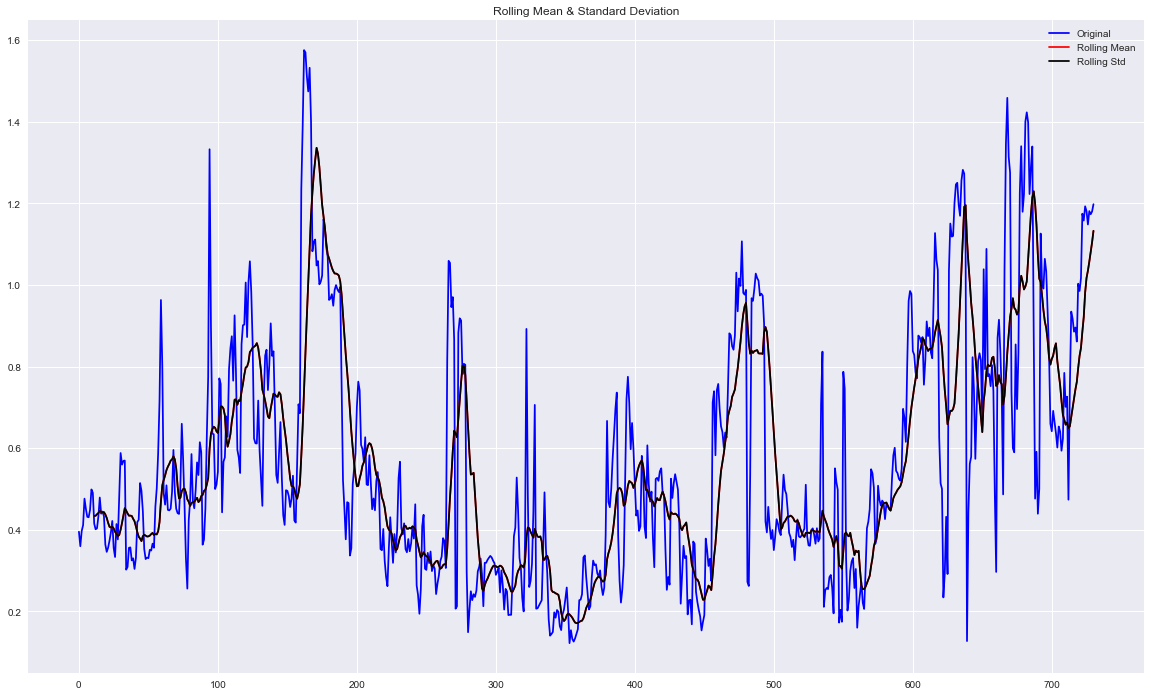

Results of Dickey-Fuller Test:
Test Statistic                  -2.568031
p-value                          0.099786
#Lags Used                      15.000000
Number of Observations Used    715.000000
Critical Value (1%)             -3.439529
Critical Value (5%)             -2.865591
Critical Value (10%)            -2.568927
dtype: float64


In [29]:
test_stationarity(df['bidask'])

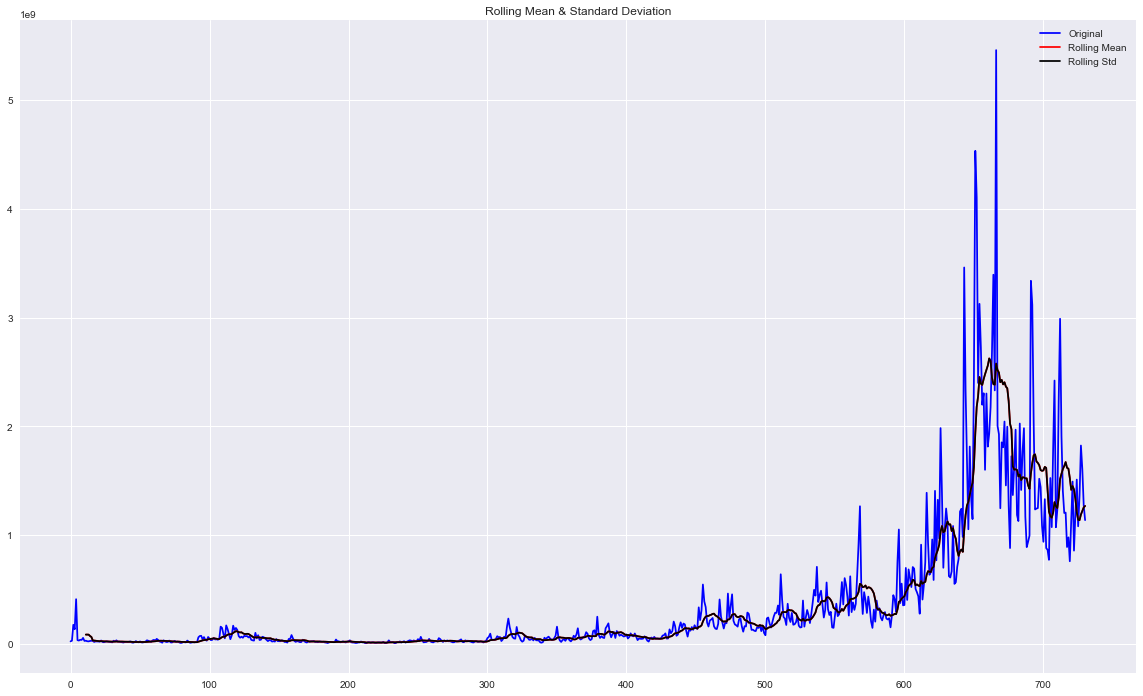

Results of Dickey-Fuller Test:
Test Statistic                  -0.892091
p-value                          0.790566
#Lags Used                      19.000000
Number of Observations Used    711.000000
Critical Value (1%)             -3.439581
Critical Value (5%)             -2.865614
Critical Value (10%)            -2.568939
dtype: float64


In [30]:
test_stationarity(df['volume'])

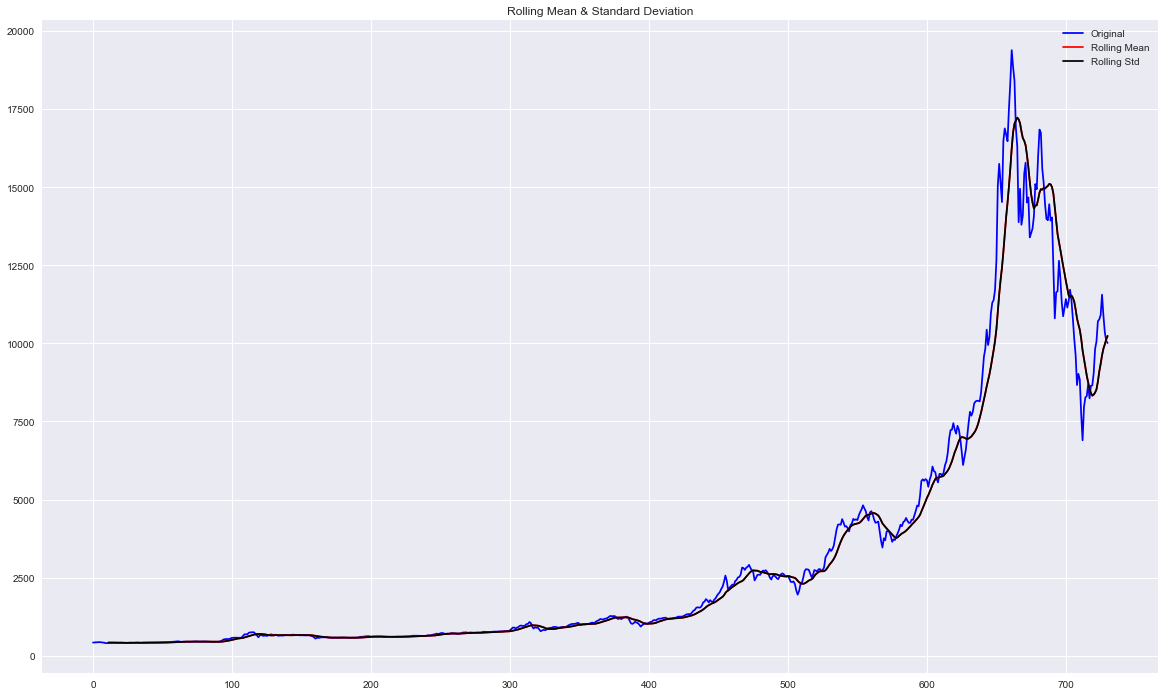

Results of Dickey-Fuller Test:
Test Statistic                  -1.197420
p-value                          0.674704
#Lags Used                      20.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [31]:
test_stationarity(df['price'])

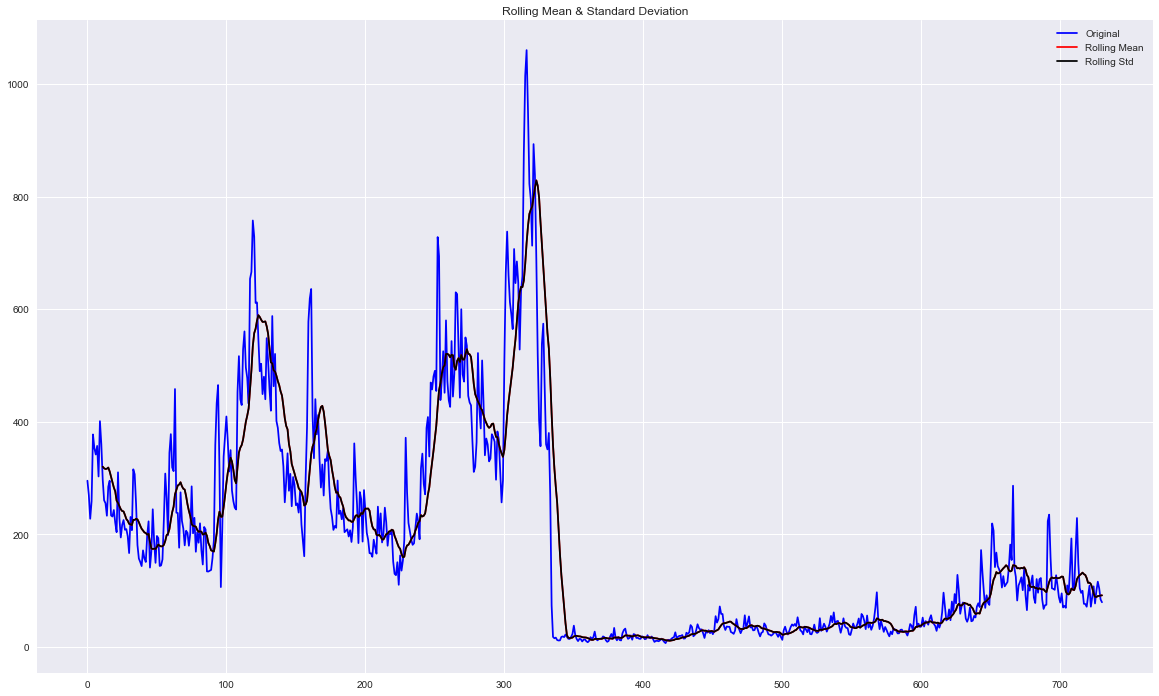

Results of Dickey-Fuller Test:
Test Statistic                  -2.501167
p-value                          0.115191
#Lags Used                       5.000000
Number of Observations Used    725.000000
Critical Value (1%)             -3.439402
Critical Value (5%)             -2.865535
Critical Value (10%)            -2.568897
dtype: float64


In [32]:
test_stationarity(df['transpm'])

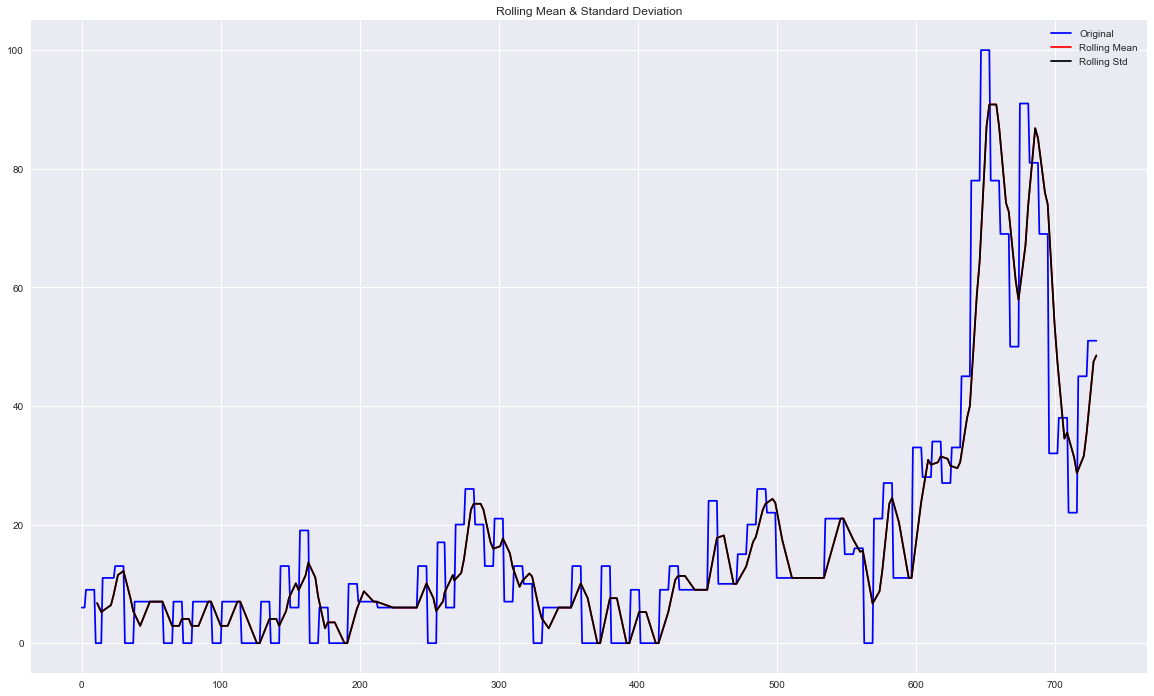

Results of Dickey-Fuller Test:
Test Statistic                  -1.987458
p-value                          0.292099
#Lags Used                       7.000000
Number of Observations Used    723.000000
Critical Value (1%)             -3.439427
Critical Value (5%)             -2.865546
Critical Value (10%)            -2.568903
dtype: float64


In [33]:
test_stationarity(df['goog_idx'])

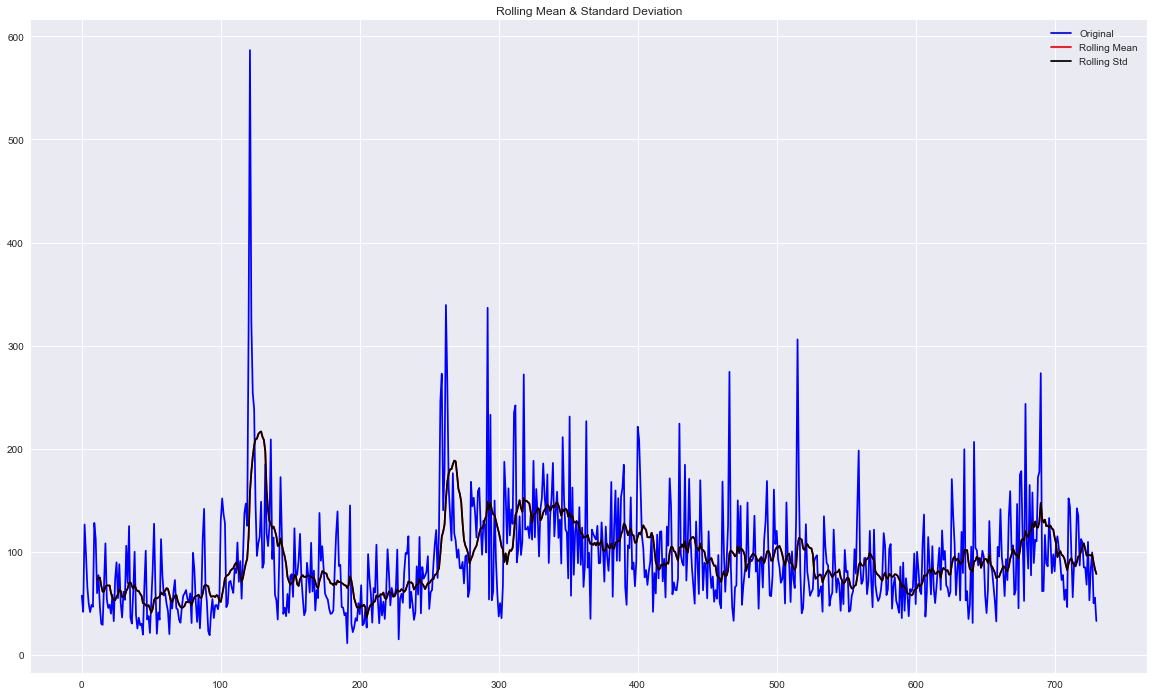

Results of Dickey-Fuller Test:
Test Statistic                  -3.236415
p-value                          0.017971
#Lags Used                      20.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [35]:
test_stationarity(df['epu_idx'])

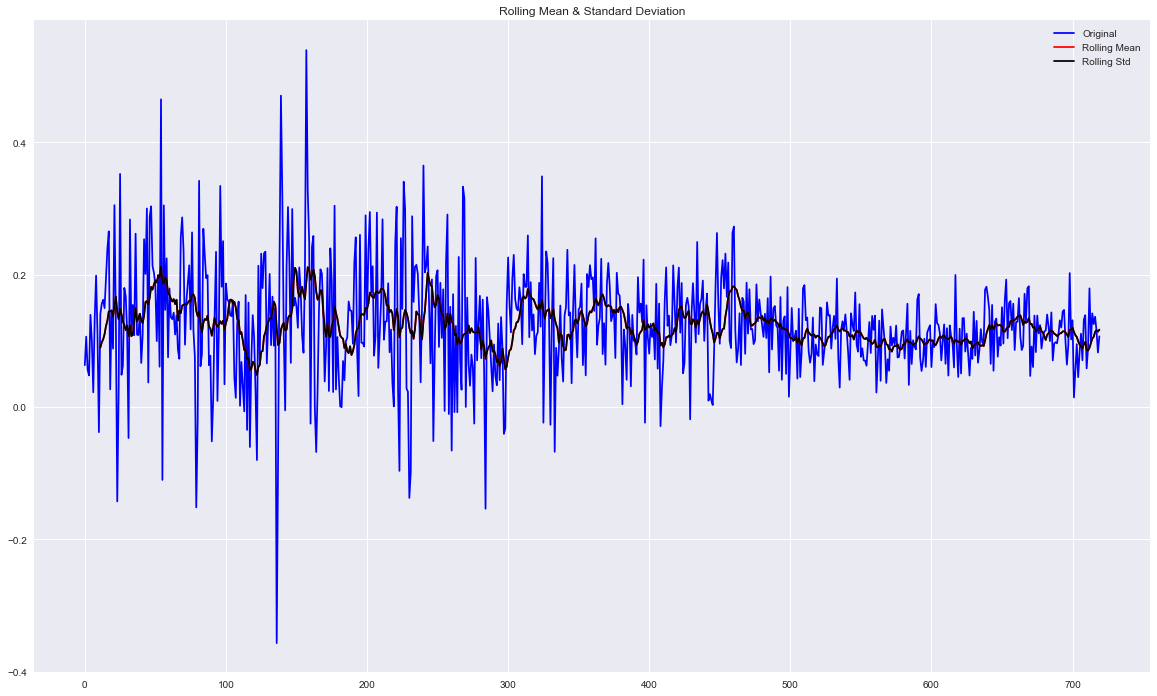

Results of Dickey-Fuller Test:
Test Statistic                 -24.128851
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    718.000000
Critical Value (1%)             -3.439490
Critical Value (5%)             -2.865574
Critical Value (10%)            -2.568918
dtype: float64


In [53]:
test_stationarity(df2['exp_sem'])